In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
!ls ../out

1_moreout.out  3_moreout.out  output_aCM.csv   output_SLATM.csv
2_moreout.out  4_moreout.out  output_FCHL.csv  output_SOAP.csv


In [4]:
soap_out = pd.read_csv("../out/output_SOAP.csv", index_col=0)

In [5]:
soap_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments
0,1,"['qm7_4752', 'qm7_51']","[[], [6, 6]]",426.0,20426.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ..."
1,2,"['qm7_51', 'qm7_4752']","[[6, 6], []]",426.0,20426.0,"[[(2, 7), (3, 8)], [(7, 1), (6, 2), (2, 3), (3..."
2,3,"['qm7_4752', 'qm7_51']","[[], [6, 6]]",426.0,20426.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ..."
3,4,"['qm7_4752', 'qm7_47']","[[6], [6]]",441.0,20441.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ..."
4,5,"['qm7_47', 'qm7_4752']","[[6], [6]]",441.0,20441.0,"[[(4, 7), (3, 8), (2, 9)], [(7, 1), (6, 2), (2..."
...,...,...,...,...,...,...
995,996,"['qm7_6632', 'qm7_6339', 'qm7_1999']","[[6, 16, 8, 8, 6, 6], [], [6, 6, 6, 7, 6, 7]]",1090.0,121090.0,"[[(7, 6)], [(7, 1), (6, 2), (4, 3), (3, 5), (1..."
996,997,"['qm7_6631', 'qm7_1580', 'qm7_5809']","[[6, 16, 8, 6, 6], [6, 7, 6, 7, 6, 7], [6]]",1090.0,121090.0,"[[(7, 6), (3, 7)], [(1, 2)], [(4, 1), (6, 3), ..."
997,998,"['qm7_1582', 'qm7_6631', 'qm7_1580']","[[7, 6, 7, 7], [6, 16, 6, 6], [6, 6, 7, 6]]",1092.0,121092.0,"[[(1, 2), (2, 3), (6, 9)], [(4, 1), (7, 6), (3..."
998,999,"['qm7_6112', 'qm7_6631', 'qm7_1580']","[[6], [6, 16, 8, 6, 6], [6, 7, 6, 7, 6, 7]]",1093.0,121093.0,"[[(1, 1), (5, 3), (7, 4), (2, 5), (6, 8), (3, ..."


In [6]:
from ast import literal_eval 

In [7]:
soap_out["Fragments"] = soap_out["Fragments"].apply(literal_eval)

In [8]:
soap_out["Sorted Fragments"] = soap_out["Fragments"].apply(lambda x:sorted(x))

In [9]:
len(np.unique(soap_out["Sorted Fragments"]))

446

In [58]:
# excess is missing Hs - to fix 

In [10]:
import qml

In [11]:
qm9_mol = qml.Compound("../targets/qm9_0.xyz")
qm9_ncharges = qm9_mol.nuclear_charges

In [12]:
qm9_ncharges

array([8, 6, 6, 7, 6, 8, 8, 7, 6, 1, 1])

In [13]:
def count_ncharges(list_ncharges, elements=[1,6,7,8,16]):
    ncharge_count = np.zeros(len(elements))
    for ncharge in list_ncharges:
        for i, elem in enumerate(elements):
            if ncharge == elem:
                ncharge_count[i] += 1
    return ncharge_count

In [14]:
qm9_counts = count_ncharges(qm9_ncharges)

In [15]:
qm9_counts

array([2., 4., 2., 3., 0.])

In [16]:
def get_excess_frags(frag_list):
    mols = [qml.Compound("../qm7/xyz/"+x+".xyz") for x in frag_list]
    ncharges = np.concatenate([mol.nuclear_charges for mol in mols])
    ncharge_count = count_ncharges(ncharges)
    
    diff_count = ncharge_count - qm9_counts
    excess = [[ncharge]*int(count) for ncharge, count in zip([1,6,7,8,16], diff_count)]
    return np.concatenate(excess)

In [17]:
get_excess_frags(['qm7_1107', 'qm7_5455'])

array([1., 1., 1., 1., 1., 1., 1., 1., 6., 6., 6., 6.])

In [18]:
soap_out["Excess"] = soap_out["Fragments"].apply(get_excess_frags)

In [20]:
soap_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments,Sorted Fragments
0,1,"[qm7_4752, qm7_51]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",426.0,20426.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ...","[qm7_4752, qm7_51]"
1,2,"[qm7_51, qm7_4752]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",426.0,20426.0,"[[(2, 7), (3, 8)], [(7, 1), (6, 2), (2, 3), (3...","[qm7_4752, qm7_51]"
2,3,"[qm7_4752, qm7_51]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",426.0,20426.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ...","[qm7_4752, qm7_51]"
3,4,"[qm7_4752, qm7_47]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",441.0,20441.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ...","[qm7_47, qm7_4752]"
4,5,"[qm7_47, qm7_4752]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",441.0,20441.0,"[[(4, 7), (3, 8), (2, 9)], [(7, 1), (6, 2), (2...","[qm7_47, qm7_4752]"
...,...,...,...,...,...,...,...
995,996,"[qm7_6632, qm7_6339, qm7_1999]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1090.0,121090.0,"[[(7, 6)], [(7, 1), (6, 2), (4, 3), (3, 5), (1...","[qm7_1999, qm7_6339, qm7_6632]"
996,997,"[qm7_6631, qm7_1580, qm7_5809]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1090.0,121090.0,"[[(7, 6), (3, 7)], [(1, 2)], [(4, 1), (6, 3), ...","[qm7_1580, qm7_5809, qm7_6631]"
997,998,"[qm7_1582, qm7_6631, qm7_1580]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1092.0,121092.0,"[[(1, 2), (2, 3), (6, 9)], [(4, 1), (7, 6), (3...","[qm7_1580, qm7_1582, qm7_6631]"
998,999,"[qm7_6112, qm7_6631, qm7_1580]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1093.0,121093.0,"[[(1, 1), (5, 3), (7, 4), (2, 5), (6, 8), (3, ...","[qm7_1580, qm7_6112, qm7_6631]"


In [21]:
# get energies
# qm7 energies are in qm7 dir 
# need qm9 energies and excess contribution

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
# need ncharges list and list of energies

In [24]:
import qml

In [25]:
qm7 = pd.read_csv("../qm7/energies.csv", index_col=0)
files = qm7["file"].to_list()

In [26]:
mols = [qml.Compound("../qm7/xyz/"+x+".xyz") for x in files]

In [27]:
ncharges = [mol.nuclear_charges for mol in mols]

In [28]:
# ncharges convert to count
elements = [1, 6, 7, 8, 16]
ncharge_counts = []
for ncharge_list in ncharges: 
    ncharge_count = count_ncharges(ncharge_list)
    ncharge_counts.append(ncharge_count)

In [29]:
energies = qm7["energy / Ha"].to_list()

In [30]:
reg = LinearRegression().fit(ncharge_counts, energies)

In [31]:
reg.score(ncharge_counts, energies)

0.9999998316921461

In [32]:
coeff_energies = reg.coef_

In [33]:
coeff_energies

array([  -0.61002842,  -38.01906467,  -54.64773278,  -75.09076869,
       -397.94238855])

In [34]:
coeff_energies = dict(zip(elements, coeff_energies))

In [66]:
coeff_energies

{1: -0.610028423353568,
 6: -38.01906466911171,
 7: -54.647732784759256,
 8: -75.09076868694648,
 16: -397.9423885459585}

In [57]:
def match_file_to_energy(filename):
    energies = pd.read_csv("../qm7/energies.csv")
    energy = energies.loc[energies["file"] == filename]["energy / Ha"]
    return float(energy)

In [36]:
def get_excess_energy(excess_ncharges):
    energy = np.sum([coeff_energies[x] for x in excess_ncharges])
    return energy

In [58]:
def get_reaction_energy(fragment_list, excess_ncharges):
    qm9_energy = -487.817450280942 # Ha
    
    excess_energy = get_excess_energy(excess_ncharges)
    
    frag_energies = np.sum([match_file_to_energy(x) for x in fragment_list])
    
    rxn_energy = frag_energies - qm9_energy - excess_energy
    return rxn_energy

In [59]:
soap_out["energies / Ha"] = soap_out.apply(lambda x: get_reaction_energy(x["Fragments"], x["Excess"]), axis=1)

excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6.] w energy -80.91835672505195
frag qm7_4752 energy -359.94915612233297
frag qm7_51 energy -208.720197958732
rxn energy 0.06645292492899557
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6.] w energy -80.91835672505195
frag qm7_51 energy -208.720197958732
frag qm7_4752 energy -359.94915612233297
rxn energy 0.06645292492899557
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6.] w energy -80.91835672505195
frag qm7_4752 energy -359.94915612233297
frag qm7_51 energy -208.720197958732
rxn energy 0.06645292492899557
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6.] w energy -80.91835672505195
frag qm7_4752 energy -359.94915612233297
frag qm7_47 energy -208.741071638824
rxn energy 0.04557924483700049
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6.] w energy -80.91835672505195
frag qm7_47 energy -208.741071638824
frag qm7_4752 energy -359.94915612233297
rxn energy 0.04557924483700049
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6.] w energy -80.91835672505195

frag qm7_52 energy -209.988728469865
rxn energy 0.01797926050312526
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6.] w energy -85.7985841118805
frag qm7_52 energy -209.988728469865
frag qm7_50 energy -208.812352694174
frag qm7_6 energy -154.727631688702
rxn energy 0.08732154008148996
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6.] w energy -85.7985841118805
frag qm7_52 energy -209.988728469865
frag qm7_50 energy -208.812352694174
frag qm7_6 energy -154.727631688702
rxn energy 0.08732154008148996
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6.] w energy -80.91835672505195
frag qm7_4752 energy -359.94915612233297
frag qm7_51 energy -208.720197958732
rxn energy 0.06645292492899557
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6.] w energy -80.91835672505195
frag qm7_4752 energy -359.94915612233297
frag qm7_51 energy -208.720197958732
rxn energy 0.06645292492899557
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6.] w energy -82.13841357175909


frag qm7_4752 energy -359.94915612233297
rxn energy -0.013461546759060639
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 8.] w energy -232.04725475022184
frag qm7_4174 energy -359.92901045559
frag qm7_4752 energy -359.94915612233297
rxn energy -0.013461546759060639
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 8.] w energy -233.267311596929
frag qm7_5458 energy -361.078347884252
frag qm7_4752 energy -359.94915612233297
rxn energy 0.05725787128602633
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 8.] w energy -232.04725475022184
frag qm7_6177 energy -359.89281185602204
frag qm7_4752 energy -359.94915612233297
rxn energy 0.022737052808849967
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 8.] w energy -232.04725475022184
frag qm7_6118 energy -359.900372287638
frag qm7_4752 energy -359.94915612233297
rxn energy 0.01517662119289298
excess ncharges [1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 8.] w energy -230.82719790351473
frag qm7_6119 energy -358.695238729764
frag qm7_47

frag qm7_4752 energy -359.94915612233297
rxn energy -0.055960626931863544
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 8.] w energy -232.04725475022184
frag qm7_4174 energy -359.92901045559
frag qm7_4752 energy -359.94915612233297
rxn energy -0.013461546759060639
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 8.] w energy -233.267311596929
frag qm7_4758 energy -361.173739857007
frag qm7_4752 energy -359.94915612233297
rxn energy -0.03813410146898377
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 8.] w energy -232.04725475022184
frag qm7_4752 energy -359.94915612233297
frag qm7_6123 energy -359.91193164601896
rxn energy 0.0036172628119288674
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 8.] w energy -233.267311596929
frag qm7_6232 energy -361.16966213475405
frag qm7_4752 energy -359.94915612233297
rxn energy -0.03405637921599691
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 8.] w energy -233.267311596929
frag qm7_6232 energy -361.16966

frag qm7_1580 energy -319.028180044517
rxn energy 0.11921709169030237
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  8. 16.] w energy -593.1906354737757
frag qm7_5717 energy -340.06849844411096
frag qm7_6631 energy -740.817834275094
rxn energy 0.121753035512711
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -570.917514301528
frag qm7_2000 energy -317.868923867195
frag qm7_6566 energy -740.825867082256
rxn energy 0.040173633018866894
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -572.137571148235
frag qm7_6631 energy -740.817834275094
frag qm7_1811 energy -319.013099059647
rxn energy 0.12408809443593327
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -570.917514301528
frag qm7_2000 energy -317.868923867195
frag qm7_6631 energy -740.817834275094
rxn energy 0.04820644018104758
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -570.917514301528
frag qm

frag qm7_6632 energy -742.0276811396769
frag qm7_1999 energy -319.049556159996
rxn energy 0.09784097621115961
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -572.137571148235
frag qm7_6631 energy -740.817834275094
frag qm7_1811 energy -319.013099059647
rxn energy 0.12408809443593327
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -572.137571148235
frag qm7_6631 energy -740.817834275094
frag qm7_1580 energy -319.028180044517
rxn energy 0.10900710956605053
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -572.137571148235
frag qm7_6631 energy -740.817834275094
frag qm7_1999 energy -319.049556159996
rxn energy 0.08763099408713515
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -570.917514301528
frag qm7_2012 energy -317.865540751751
frag qm7_6566 energy -740.825867082256
rxn energy 0.04355674846306101
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  

frag qm7_6696 energy -738.2941314784081
rxn energy 0.18517677082786577
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -572.137571148235
frag qm7_6566 energy -740.825867082256
frag qm7_1999 energy -319.049556159996
rxn energy 0.07959818692495446
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -573.3576279949422
frag qm7_6632 energy -742.0276811396769
frag qm7_1999 energy -319.049556159996
rxn energy 0.09784097621115961
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -570.917514301528
frag qm7_6631 energy -740.817834275094
frag qm7_2001 energy -317.789136362505
rxn energy 0.12799394487092286
excess ncharges [ 1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -569.6974574548208
frag qm7_2101 energy -319.026308303839
frag qm7_6696 energy -738.2941314784081
rxn energy 0.19446795351564106
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -573.35762

frag qm7_6566 energy -740.825867082256
rxn energy 0.10778537255407628
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -570.917514301528
frag qm7_2012 energy -317.865540751751
frag qm7_6566 energy -740.825867082256
rxn energy 0.04355674846306101
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -572.137571148235
frag qm7_6631 energy -740.817834275094
frag qm7_1580 energy -319.028180044517
rxn energy 0.10900710956605053
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -572.137571148235
frag qm7_2000 energy -317.868923867195
frag qm7_6632 energy -742.0276811396769
rxn energy 0.05841642230495836
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -572.137571148235
frag qm7_6566 energy -740.825867082256
frag qm7_1999 energy -319.049556159996
rxn energy 0.07959818692495446
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -572.137571148

frag qm7_1580 energy -319.028180044517
rxn energy 0.10900710956605053
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -572.137571148235
frag qm7_6631 energy -740.817834275094
frag qm7_1580 energy -319.028180044517
rxn energy 0.10900710956605053
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -573.3576279949422
frag qm7_6632 energy -742.0276811396769
frag qm7_1580 energy -319.028180044517
rxn energy 0.11921709169030237
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -574.5776848416493
frag qm7_1582 energy -320.252815665476
frag qm7_6632 energy -742.0276811396769
rxn energy 0.11463831743833452
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -570.917514301528
frag qm7_2006 energy -317.791885390019
frag qm7_6566 energy -740.825867082256
rxn energy 0.11721211019494149
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  

frag qm7_1580 energy -319.028180044517
rxn energy 0.10900710956605053
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -570.917514301528
frag qm7_2006 energy -317.791885390019
frag qm7_6566 energy -740.825867082256
rxn energy 0.11721211019494149
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -570.917514301528
frag qm7_2000 energy -317.868923867195
frag qm7_6566 energy -740.825867082256
rxn energy 0.040173633018866894
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -572.137571148235
frag qm7_2000 energy -317.868923867195
frag qm7_6632 energy -742.0276811396769
rxn energy 0.05841642230495836
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -573.3576279949422
frag qm7_1582 energy -320.252815665476
frag qm7_6631 energy -740.817834275094
rxn energy 0.10442833531408269
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w ene

frag qm7_6631 energy -740.817834275094
rxn energy 0.10442833531408269
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -572.137571148235
frag qm7_6631 energy -740.817834275094
frag qm7_1999 energy -319.049556159996
rxn energy 0.08763099408713515
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -572.137571148235
frag qm7_2000 energy -317.868923867195
frag qm7_6632 energy -742.0276811396769
rxn energy 0.05841642230495836
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -572.137571148235
frag qm7_6631 energy -740.817834275094
frag qm7_1580 energy -319.028180044517
rxn energy 0.10900710956605053
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -572.137571148235
frag qm7_6631 energy -740.817834275094
frag qm7_1580 energy -319.028180044517
rxn energy 0.10900710956605053
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  7. 16.] w energy -572.1

frag qm7_1582 energy -320.252815665476
frag qm7_6631 energy -740.817834275094
rxn energy 0.13492865854004776
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  6.  7. 16.] w energy -611.3766926640538
frag qm7_0 energy -40.428678039299996
frag qm7_2000 energy -317.868923867195
frag qm7_6566 energy -740.825867082256
rxn energy 0.07067395624483197
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  6.  7. 16.] w energy -611.3766926640538
frag qm7_2006 energy -317.791885390019
frag qm7_0 energy -40.428678039299996
frag qm7_6566 energy -740.825867082256
rxn energy 0.14771243342090656
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  6.  6.  7. 16.] w energy -611.3766926640538
frag qm7_0 energy -40.428678039299996
frag qm7_2000 energy -317.868923867195
frag qm7_6566 energy -740.825867082256
rxn energy 0.07067395624483197
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.  6.
  6.  7. 16.] w ene

frag qm7_0 energy -40.428678039299996
frag qm7_6631 energy -740.817834275094
frag qm7_0 energy -40.428678039299996
frag qm7_1580 energy -319.028180044517
rxn energy 0.170007756017867
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  6.  6.  6.  6.  6.  7. 16.] w energy -654.2759847199941
frag qm7_0 energy -40.428678039299996
frag qm7_1582 energy -320.252815665476
frag qm7_0 energy -40.428678039299996
frag qm7_6631 energy -740.817834275094
rxn energy 0.16542898176612653
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  6.
  6.  6.  6.  6.  7. 16.] w energy -653.0559278732869
frag qm7_0 energy -40.428678039299996
frag qm7_6632 energy -742.0276811396769
frag qm7_0 energy -40.428678039299996
frag qm7_2000 energy -317.868923867195
rxn energy 0.1194170687570022
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  6.
  6.  6.  6.  6.  7. 16.] w energy -653.0559278732869
frag qm7_0

frag qm7_1582 energy -320.252815665476
frag qm7_6631 energy -740.817834275094
frag qm7_4 energy -154.74426259107
rxn energy 0.149234309535359
excess ncharges [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  6  6  6  6  6  7  8 16] w energy -726.9266397135264
frag qm7_4 energy -154.74426259107
frag qm7_6631 energy -740.817834275094
frag qm7_1999 energy -319.049556159996
rxn energy 0.13243696830841145
excess ncharges [ 1  1  1  1  1  1  1  1  1  1  1  1  1  6  6  6  6  6  7  8 16] w energy -725.7065828668192
frag qm7_4 energy -154.74426259107
frag qm7_2012 energy -317.865540751751
frag qm7_6566 energy -740.825867082256
rxn energy 0.08836272268422363
excess ncharges [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  6  6  6  6  6  7  8 16] w energy -726.9266397135264
frag qm7_4 energy -154.74426259107
frag qm7_6631 energy -740.817834275094
frag qm7_1999 energy -319.049556159996
rxn energy 0.13243696830841145
excess ncharges [ 1  1  1  1  1  1  1  1  1  1  1  1  1  6  6  6  6  6  7  8 16] w ener

frag qm7_4752 energy -359.94915612233297
frag qm7_5986 energy -358.696968595785
rxn energy 0.09439135798697862
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 6. 7. 8.] w energy -402.58226681237693
frag qm7_32 energy -171.659201017214
frag qm7_4752 energy -359.94915612233297
frag qm7_5986 energy -358.696968595785
rxn energy 0.09439135798697862
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.
 6. 6. 6. 6. 6.] w energy -354.3721504890767
frag qm7_6897 energy -273.396618251135
frag qm7_4752 energy -359.94915612233297
frag qm7_51 energy -208.720197958732
rxn energy 0.12362843781875199
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 7. 8. 8.] w energy -439.65397083021173
frag qm7_4752 energy -359.94915612233297
frag qm7_50 energy -208.812352694174
frag qm7_5986 energy -358.696968595785
rxn energy 0.012943698861704434
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.
 6. 6. 

frag qm7_6631 energy -740.817834275094
frag qm7_1999 energy -319.049556159996
rxn energy 0.08559723885309722
excess ncharges [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  6  6  6  6  6  6  7  8 16] w energy -764.945704382638
frag qm7_1580 energy -319.028180044517
frag qm7_6566 energy -740.825867082256
frag qm7_40 energy -192.77648936854197
rxn energy 0.1326181682652532
excess ncharges [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  6  6  6  6  6  7  7  8 16] w energy -780.9643440749321
frag qm7_50 energy -208.812352694174
frag qm7_2000 energy -317.868923867195
frag qm7_6632 energy -742.0276811396769
rxn energy 0.0728366548280519
excess ncharges [ 1  1  1  1  1  1  1  1  1  1  1  1  6  6  6  6  6  7  7  8 16] w energy -779.744287228225
frag qm7_2006 energy -317.791885390019
frag qm7_49 energy -208.828806681931
frag qm7_6566 energy -740.825867082256
rxn energy 0.11517835496101725
excess ncharges [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  6  6  6  6  6  6  7
  8 16] w energy -766.1

frag qm7_1582 energy -320.252815665476
frag qm7_44 energy -190.282622894641
frag qm7_6631 energy -740.817834275094
rxn energy 0.1898249816617863
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  6.  6.  6.  6.  6.  6.  7.  7. 16.] w energy -748.7728674439259
frag qm7_0 energy -40.428678039299996
frag qm7_1582 energy -320.252815665476
frag qm7_12 energy -134.909757012745
frag qm7_6631 energy -740.817834275094
rxn energy 0.18123273225273806
excess ncharges [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  6  6  6
  6  6  6  7  8 16] w energy -768.6058749227595
frag qm7_1582 energy -320.252815665476
frag qm7_0 energy -40.428678039299996
frag qm7_6631 energy -740.817834275094
frag qm7_4 energy -154.74426259107
rxn energy 0.17973463276143775
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  6.  6.  6.  6.  6.  6.  7.  7. 16.] w energy -746.3327537505115
frag qm7_1582 energy -320.

frag qm7_92 energy -246.828806578945
frag qm7_2000 energy -317.868923867195
frag qm7_6566 energy -740.825867082256
rxn energy 0.057204649882805825
excess ncharges [ 1  1  1  1  1  1  1  1  1  1  1  1  6  6  6  6  6  6  7  7  8 16] w energy -817.7633518973366
frag qm7_2012 energy -317.865540751751
frag qm7_92 energy -246.828806578945
frag qm7_6566 energy -740.825867082256
rxn energy 0.060587765326545195
excess ncharges [ 1  1  1  1  1  1  1  1  1  1  1  1  6  6  6  6  6  6  7  7  8 16] w energy -817.7633518973366
frag qm7_92 energy -246.828806578945
frag qm7_2000 energy -317.868923867195
frag qm7_6566 energy -740.825867082256
rxn energy 0.057204649882805825
excess ncharges [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  6.  6.  6.  6.  6.  6.  6.  7.  7. 16.] w energy -785.5718752663304
frag qm7_6631 energy -740.817834275094
frag qm7_1580 energy -319.028180044517
frag qm7_178 energy -213.38338251089502
rxn energy 0.15992871676644427
excess ncharges [ 1

frag qm7_4066 energy -359.98548138741097
rxn energy -0.003454695480400005
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 6. 6. 7. 8. 8.] w energy -516.9121570151423
frag qm7_4752 energy -359.94915612233297
frag qm7_6123 energy -359.91193164601896
frag qm7_951 energy -284.785362271626
rxn energy 0.08315725610634672
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 6.
 6. 7. 8. 8.] w energy -519.3522707085565
frag qm7_961 energy -286.01848132852797
frag qm7_4752 energy -359.94915612233297
frag qm7_5950 energy -361.14233376115897
rxn energy 0.05974977747860066
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 6.
 6. 7. 8. 8.] w energy -519.3522707085565
frag qm7_4758 energy -361.173739857007
frag qm7_4752 energy -359.94915612233297
frag qm7_961 energy -286.01848132852797
rxn energy 0.028343681630531137
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 6.
 

frag qm7_3808 energy -339.964367711249
frag qm7_272 energy -249.021058248065
frag qm7_4752 energy -359.94915612233297
rxn energy 0.11037056447605664
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 7. 7.] w energy -464.88767290530234
frag qm7_277 energy -251.395343601023
frag qm7_4752 energy -359.94915612233297
frag qm7_3839 energy -341.256909451916
rxn energy 0.10371401097233957
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 7. 7.] w energy -463.6676160585952
frag qm7_3808 energy -339.964367711249
frag qm7_277 energy -251.395343601023
frag qm7_4752 energy -359.94915612233297
rxn energy 0.176198904932221
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 7. 7.] w energy -462.447559211888
frag qm7_3857 energy -338.785619641172
frag qm7_277 energy -251.395343601023
frag qm7_4752 energy -359.94915612233297
rxn energy 0.1348

frag qm7_997 energy -286.053481861926
frag qm7_4758 energy -361.173739857007
frag qm7_4752 energy -359.94915612233297
rxn energy -0.006656851767388616
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 6.
 6. 7. 8. 8.] w energy -519.3522707085565
frag qm7_997 energy -286.053481861926
frag qm7_4758 energy -361.173739857007
frag qm7_4752 energy -359.94915612233297
rxn energy -0.006656851767388616
excess ncharges [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  6  6  6  6  6  6  6  7
  7  8 16] w energy -858.2225302598627
frag qm7_2000 energy -317.868923867195
frag qm7_986 energy -287.298702120067
frag qm7_6566 energy -740.825867082256
rxn energy 0.04648747128658215
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6. 6. 6.
 6. 7. 8. 8.] w energy -519.3522707085565
frag qm7_997 energy -286.053481861926
frag qm7_4752 energy -359.94915612233297
frag qm7_5950 energy -361.14233376115897
rxn energy 0.024749244080567223
excess nc

frag qm7_4752 energy -359.94915612233297
frag qm7_5986 energy -358.696968595785
frag qm7_6736 energy -304.223802410166
rxn energy 0.045737358078326906
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 7. 8.] w energy -521.5196882065405
frag qm7_4174 energy -359.92901045559
frag qm7_4752 energy -359.94915612233297
frag qm7_4227 energy -289.460629863607
rxn energy -0.001657954047345811
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 7. 8.] w energy -521.5196882065405
frag qm7_4174 energy -359.92901045559
frag qm7_4752 energy -359.94915612233297
frag qm7_4227 energy -289.460629863607
rxn energy -0.001657954047345811
excess ncharges [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 7. 8.] w energy -521.5196882065405
frag qm7_4174 energy -359.92901045559
frag qm7_4752 energy -359.94915612233297
frag qm7_4227 energy -289.460629863607
rxn energ

frag qm7_4752 energy -359.94915612233297
frag qm7_4865 energy -341.33028547382196
rxn energy 0.06161085836743041
excess ncharges [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  6  6  6  6  6  6  6  7
  7  8  8 16] w energy -933.313298946809
frag qm7_4166 energy -359.90858626529297
frag qm7_6632 energy -742.0276811396769
frag qm7_1999 energy -319.049556159996
rxn energy 0.14492566278522645
excess ncharges [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  6  6  6  6  6  6  6  7  7
  7  8 16] w energy -912.2602346212682
frag qm7_5805 energy -340.058959544701
frag qm7_6631 energy -740.817834275094
frag qm7_1580 energy -319.028180044517
rxn energy 0.17271103789812514
excess ncharges [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  6  6  6  6
  6  6  6  7  7  8  8 16] w energy -935.7534126402234
frag qm7_4505 energy -362.403301233374
frag qm7_6632 energy -742.0276811396769
frag qm7_1999 energy -319.049556159996
rxn energy 0.09032438811846077
excess ncharges [ 1  1  1  1  1  1  1 

frag qm7_1999 energy -319.049556159996
rxn energy 0.2143105175382516
excess ncharges [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  6  6  6  6  6  6
  6  7  7  8  8 16] w energy -934.5333557935162
frag qm7_6632 energy -742.0276811396769
frag qm7_4214 energy -361.098319851222
frag qm7_1999 energy -319.049556159996
rxn energy 0.17524892356323107
excess ncharges [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  6  6  6  6  6  6
  6  7  7  8  8 16] w energy -934.5333557935162
frag qm7_6632 energy -742.0276811396769
frag qm7_4033 energy -361.10824297863996
frag qm7_1999 energy -319.049556159996
rxn energy 0.16532579614545284
excess ncharges [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  6  6  6  6
  6  6  6  7  7  8  8 16] w energy -935.7534126402234
frag qm7_4613 energy -362.30463430843497
frag qm7_6632 energy -742.0276811396769
frag qm7_1999 energy -319.049556159996
rxn energy 0.1889913130576133
excess ncharges [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

frag qm7_1582 energy -320.252815665476
frag qm7_6631 energy -740.817834275094
frag qm7_1580 energy -319.028180044517
rxn energy 0.14584743828936553
excess ncharges [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  6  6  6  6
  6  6  6  6  7  7  8 16] w energy -898.6817086223886
frag qm7_6632 energy -742.0276811396769
frag qm7_49 energy -208.828806681931
frag qm7_10 energy -116.41989591901
frag qm7_1999 energy -319.049556159996
rxn energy 0.17321900271656432
excess ncharges [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  6  6  6  6  6  6  6  7
  7  8  8 16] w energy -933.313298946809
frag qm7_6632 energy -742.0276811396769
frag qm7_6339 energy -359.879626381495
frag qm7_1999 energy -319.049556159996
rxn energy 0.17388554658327848
excess ncharges [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  6  6  6  6  6  6  6  7  7
  7  8 16] w energy -912.2602346212682
frag qm7_6631 energy -740.817834275094
frag qm7_1580 energy -319.028180044517
frag qm7_5809 energy -340.025782109759
rx

In [40]:
soap_out["energies / kcal/mol"] = soap_out["energies / Ha"] * 627.5

In [41]:
soap_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments,Sorted Fragments,energies / Ha,energies / kcal/mol
0,1,"[qm7_4752, qm7_51]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",426.0,20426.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ...","[qm7_4752, qm7_51]",0.066453,41.699210
1,2,"[qm7_51, qm7_4752]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",426.0,20426.0,"[[(2, 7), (3, 8)], [(7, 1), (6, 2), (2, 3), (3...","[qm7_4752, qm7_51]",0.066453,41.699210
2,3,"[qm7_4752, qm7_51]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",426.0,20426.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ...","[qm7_4752, qm7_51]",0.066453,41.699210
3,4,"[qm7_4752, qm7_47]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",441.0,20441.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ...","[qm7_47, qm7_4752]",0.045579,28.600976
4,5,"[qm7_47, qm7_4752]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",441.0,20441.0,"[[(4, 7), (3, 8), (2, 9)], [(7, 1), (6, 2), (2...","[qm7_47, qm7_4752]",0.045579,28.600976
...,...,...,...,...,...,...,...,...,...
995,996,"[qm7_6632, qm7_6339, qm7_1999]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1090.0,121090.0,"[[(7, 6)], [(7, 1), (6, 2), (4, 3), (3, 5), (1...","[qm7_1999, qm7_6339, qm7_6632]",0.173886,109.113180
996,997,"[qm7_6631, qm7_1580, qm7_5809]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1090.0,121090.0,"[[(7, 6), (3, 7)], [(1, 2)], [(4, 1), (6, 3), ...","[qm7_1580, qm7_5809, qm7_6631]",0.205888,129.195017
997,998,"[qm7_1582, qm7_6631, qm7_1580]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1092.0,121092.0,"[[(1, 2), (2, 3), (6, 9)], [(4, 1), (7, 6), (3...","[qm7_1580, qm7_1582, qm7_6631]",0.145847,91.519268
998,999,"[qm7_6112, qm7_6631, qm7_1580]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1093.0,121093.0,"[[(1, 1), (5, 3), (7, 4), (2, 5), (6, 8), (3, ...","[qm7_1580, qm7_6112, qm7_6631]",0.126012,79.072430


In [52]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

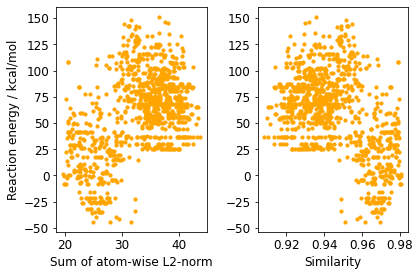

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(np.sqrt(soap_out["ObjValNoPen"]), soap_out["energies / kcal/mol"], s=10, color='orange')
ax[0].set_xlabel("Sum of atom-wise L2-norm")
ax[0].set_ylabel("Reaction energy / kcal/mol")

x = np.exp(-soap_out["ObjValNoPen"]/(2*100**2))
ax[1].scatter(x, soap_out["energies / kcal/mol"], s=10, color='orange')
ax[1].set_xlabel("Similarity")

plt.tight_layout()
plt.savefig("../figures/correlation-soap.png", dpi=300)
plt.show()